In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [2]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy

def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended


def is_mjj(month):
    return (month>=5) & (month<=7)
def is_jja(month):
    return (month>=6) & (month<=8)

def is_mam(month):
    return (month>=3) & (month<=5)
def is_nd(month):
    return (month==11) | (month==12)


dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'
path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'


dir_thetao_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/thetao/mon/'
#dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/thetao/mon/'
#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'

period_str = 1985
period_end = 2004
%matplotlib inline



/tmp/ipykernel_16386/2920072338.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
omip1_models = pd.read_csv(dir_proj+'/scripts/omip1_models_for_BF_zos.txt',header=None,delimiter=',')
omip1_models = omip1_models[0].values.tolist()
print(omip1_models)

['CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'NorESM2-LM']


# Load data 
- TAV_OMIP/scripts/processing/prepare_temperature_eq_omip1.ipynb
- TAV_OMIP/scripts/processing/prepare_temperature_af_omip1.ipynb

### ORA-S5

In [4]:
thetao_eq_oras5 = xr.open_dataset(path_data_out+'temp_oras5_eq_1985_2004.nc')

dtdz_eq_oras5_old = xr.open_dataset(path_data_out+'dtdz_oras5_eq_1985_2004.nc')
dtdz_eq_oras5 = xr.open_dataset(path_data_out+'dtdz_oras5_eq_1985_2004_newtest.nc')
mld_eq_oras5 = xr.open_dataset(path_data_out+'mld_oras5_1985_2004.nc')


thetao_eq_oras5_jja = thetao_eq_oras5.tempa.sel(time=is_mjj(thetao_eq_oras5.tempa['time.month']))
dtdz_eq_oras5_jja = dtdz_eq_oras5.dtdz_max.sel(time=is_mjj(dtdz_eq_oras5.dtdz_max['time.month'])).mean(dim='time')
mld_eq_oras5_jja = mld_eq_oras5.mld.sel(time=is_mjj(mld_eq_oras5.mld['time.month'])).mean(dim='time')

In [5]:
mld_eq_oras5_jja_mean = mld_eq_oras5_jja.mean(dim='lat')

### MOM-JRA55

In [6]:
thetao_eq_mom = xr.open_dataset(path_data_out+'temp_mom_JRA55_eq_1985_2004.nc')
dtdz_eq_mom = xr.open_dataset(path_data_out+'dtdz_mom_eq_1985_2004_newtest.nc')
mld_eq_mom = xr.open_dataset(path_data_out+'mld_mom_JRA55_eq_1985_2004.nc')


thetao_eq_mom025 = xr.open_dataset(path_data_out+'temp_mom025_JRA55_eq_1985_2004.nc')
dtdz_eq_mom025 = xr.open_dataset(path_data_out+'dtdz_mom025_eq_1985_2004_newtest.nc')
mld_eq_mom025 = xr.open_dataset(path_data_out+'mld_mom025_eq_1985_2004.nc')


thetao_eq_mom_core2 = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_eq_1985_2004.nc')
dtdz_eq_mom_core2 = xr.open_dataset(path_data_out+'dtdz_mom_core2_eq_1985_2004_newtest.nc')
mld_eq_mom_core2 = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_eq_1985_2004.nc')


dtdz_eq_mom_core2_heat = xr.open_dataset(path_data_out+'dtdz_mom_core2_heat_eq_1985_2004_newtest.nc')
thetao_eq_mom_core2_heat = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_heat_eq_1985_2004.nc')
mld_eq_mom_core2_heat = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_heat_eq_1985_2004.nc')

In [7]:

mld_eq_mom_jja = mld_eq_mom.mld.sel(time=is_mjj(mld_eq_mom.mld['time.month'])).mean(dim='time')
mld_eq_mom025_jja = mld_eq_mom025.mld.sel(time=is_mjj(mld_eq_mom025.mld['time.month'])).mean(dim='time')
mld_eq_mom_core2_jja = mld_eq_mom_core2.mld.sel(time=is_mjj(mld_eq_mom_core2.mld['time.month'])).mean(dim='time')
mld_eq_mom_core2_heat_jja = mld_eq_mom_core2_heat.mld.sel(time=is_mjj(mld_eq_mom_core2_heat.mld['time.month'])).mean(dim='time')

In [8]:
dtdz_eq_mom_jja = dtdz_eq_mom.dtdz_max.sel(time=is_mjj(dtdz_eq_mom.dtdz_max['time.month'])).mean(dim='time')
dtdz_eq_mom025_jja = dtdz_eq_mom025.dtdz_max.sel(time=is_mjj(dtdz_eq_mom025.dtdz_max['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_jja = dtdz_eq_mom_core2.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2.dtdz_max['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_heat_jja = dtdz_eq_mom_core2_heat.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2_heat.dtdz_max['time.month'])).mean(dim='time')


In [9]:
thetao_eq_mom_jja = thetao_eq_mom.tempa.sel(time=is_mjj(thetao_eq_mom.tempa['time.month']))
thetao_eq_mom025_jja = thetao_eq_mom025.tempa.sel(time=is_mjj(thetao_eq_mom025.tempa['time.month']))
thetao_eq_mom_core2_heat_jja = thetao_eq_mom_core2_heat.tempa.sel(time=is_mjj(thetao_eq_mom_core2_heat.tempa['time.month']))
thetao_eq_mom_core2_jja = thetao_eq_mom_core2.tempa.sel(time=is_mjj(thetao_eq_mom_core2.tempa['time.month']))

In [10]:
std_thetao_eq_mom_jja = thetao_eq_mom_jja.groupby('time.year').mean().std(dim='year')
std_thetao_eq_mom025_jja = thetao_eq_mom025_jja.groupby('time.year').mean().std(dim='year')
std_thetao_eq_mom_core2_jja = thetao_eq_mom_core2_jja.groupby('time.year').mean().std(dim='year')
std_thetao_eq_mom_core2_heat_jja = thetao_eq_mom_core2_heat_jja.groupby('time.year').mean().std(dim='year')

### OMIPs

In [11]:

thetao_eq_all = xr.open_dataset(path_data_out+'temp_omip1_eq_1985_2004_new.nc')

## dtdz ##

dtdz_eq_omip1 = xr.open_dataset(path_data_out+'dtdz_eq_omip1_1985_2004_newtest_new.nc')

## mld ## 

mld_eq_omip1 = xr.open_dataset(path_data_out+'mld_omip1_eq_1985_2004_cycle5.nc')




thetao_eq_all2 = xr.open_dataset(path_data_out+'temp_omip2_eq_1985_2004.nc')

## dtdz ##
dtdz_eq_omip2 = xr.open_dataset(path_data_out+'dtdz_eq_omip2_1985_2004_newtest.nc')

## mld ## 
mld_eq_omip2 = xr.open_dataset(path_data_out+'mld_omip2_eq_1985_2004.nc')


### OMIP1

In [12]:
thetao_eq_all_jja = thetao_eq_all.tempa.sel(time=is_mjj(thetao_eq_all.tempa['time.month']))
dtdz_eq_omip1_jja = dtdz_eq_omip1.dtdz_max.sel(time=is_mjj(dtdz_eq_omip1.dtdz_max['time.month'])).mean(dim='time')
mld_eq_omip1_jja = mld_eq_omip1.mld.sel(time=is_mjj(mld_eq_omip1.mld['time.month'])).mean(dim='time')


thetao_eq_all2_jja = thetao_eq_all2.tempa.sel(time=is_mjj(thetao_eq_all2.tempa['time.month']))
dtdz_eq_omip2_jja = dtdz_eq_omip2.dtdz_max.sel(time=is_mjj(dtdz_eq_omip2.dtdz_max['time.month'])).mean(dim='time')
mld_eq_omip2_jja = mld_eq_omip2.mld.sel(time=is_mjj(mld_eq_omip2.mld['time.month'])).mean(dim='time')



# standard deviation

### ORA-S5

In [13]:
thetao_eq_oras5_jja_mean = thetao_eq_oras5_jja.groupby('time.year').mean()
std_thetao_eq_oras5_jja_mean = thetao_eq_oras5_jja_mean.std(dim='year')

### OMIP1

In [14]:
thetao_eq_all_jja_mean = thetao_eq_all_jja.groupby('time.year').mean()
std_thetao_eq_all_jja_mean = thetao_eq_all_jja_mean.std(dim='year')


thetao_eq_all2_jja_mean = thetao_eq_all2_jja.groupby('time.year').mean()
std_thetao_eq_all2_jja_mean = thetao_eq_all2_jja_mean.std(dim='year')

In [15]:
std_thetao_eq_all_jja_ensmean = np.sqrt(thetao_eq_all_jja_mean.var(dim='year').mean(dim='model'))

std_thetao_eq_all2_jja_ensmean = np.sqrt(thetao_eq_all2_jja_mean.var(dim='year').mean(dim='model'))



In [16]:
dtdz_eq_oras5_jja_atl3 = dtdz_eq_oras5_jja.where((dtdz_eq_oras5_jja.lon>=-20)&(dtdz_eq_oras5_jja.lon<=0))

In [17]:
dtdz_eq_omip1_jja_atl3 = dtdz_eq_omip1_jja.where((dtdz_eq_omip1_jja.lon>=-20)&(dtdz_eq_omip1_jja.lon<=0))
dtdz_eq_omip2_jja_atl3 = dtdz_eq_omip2_jja.where((dtdz_eq_omip2_jja.lon>=-20)&(dtdz_eq_omip2_jja.lon<=0))

dtdz_eq_mom_jja_atl3 = dtdz_eq_mom_jja.where((dtdz_eq_mom_jja.lon>=-20)&(dtdz_eq_mom_jja.lon<=0))
dtdz_eq_mom025_jja_atl3 = dtdz_eq_mom025_jja.where((dtdz_eq_mom025_jja.lon>=-20)&(dtdz_eq_mom025_jja.lon<=0))
dtdz_eq_mom_core2_jja_atl3 = dtdz_eq_mom_core2_jja.where((dtdz_eq_mom_core2_jja.lon>=-20)&(dtdz_eq_mom_core2_jja.lon<=0))
dtdz_eq_mom_core2_heat_jja_atl3 = dtdz_eq_mom_core2_heat_jja.where((dtdz_eq_mom_core2_heat_jja.lon>=-20)&(dtdz_eq_mom_core2_heat_jja.lon<=0))

# Figure S06

## ALL models

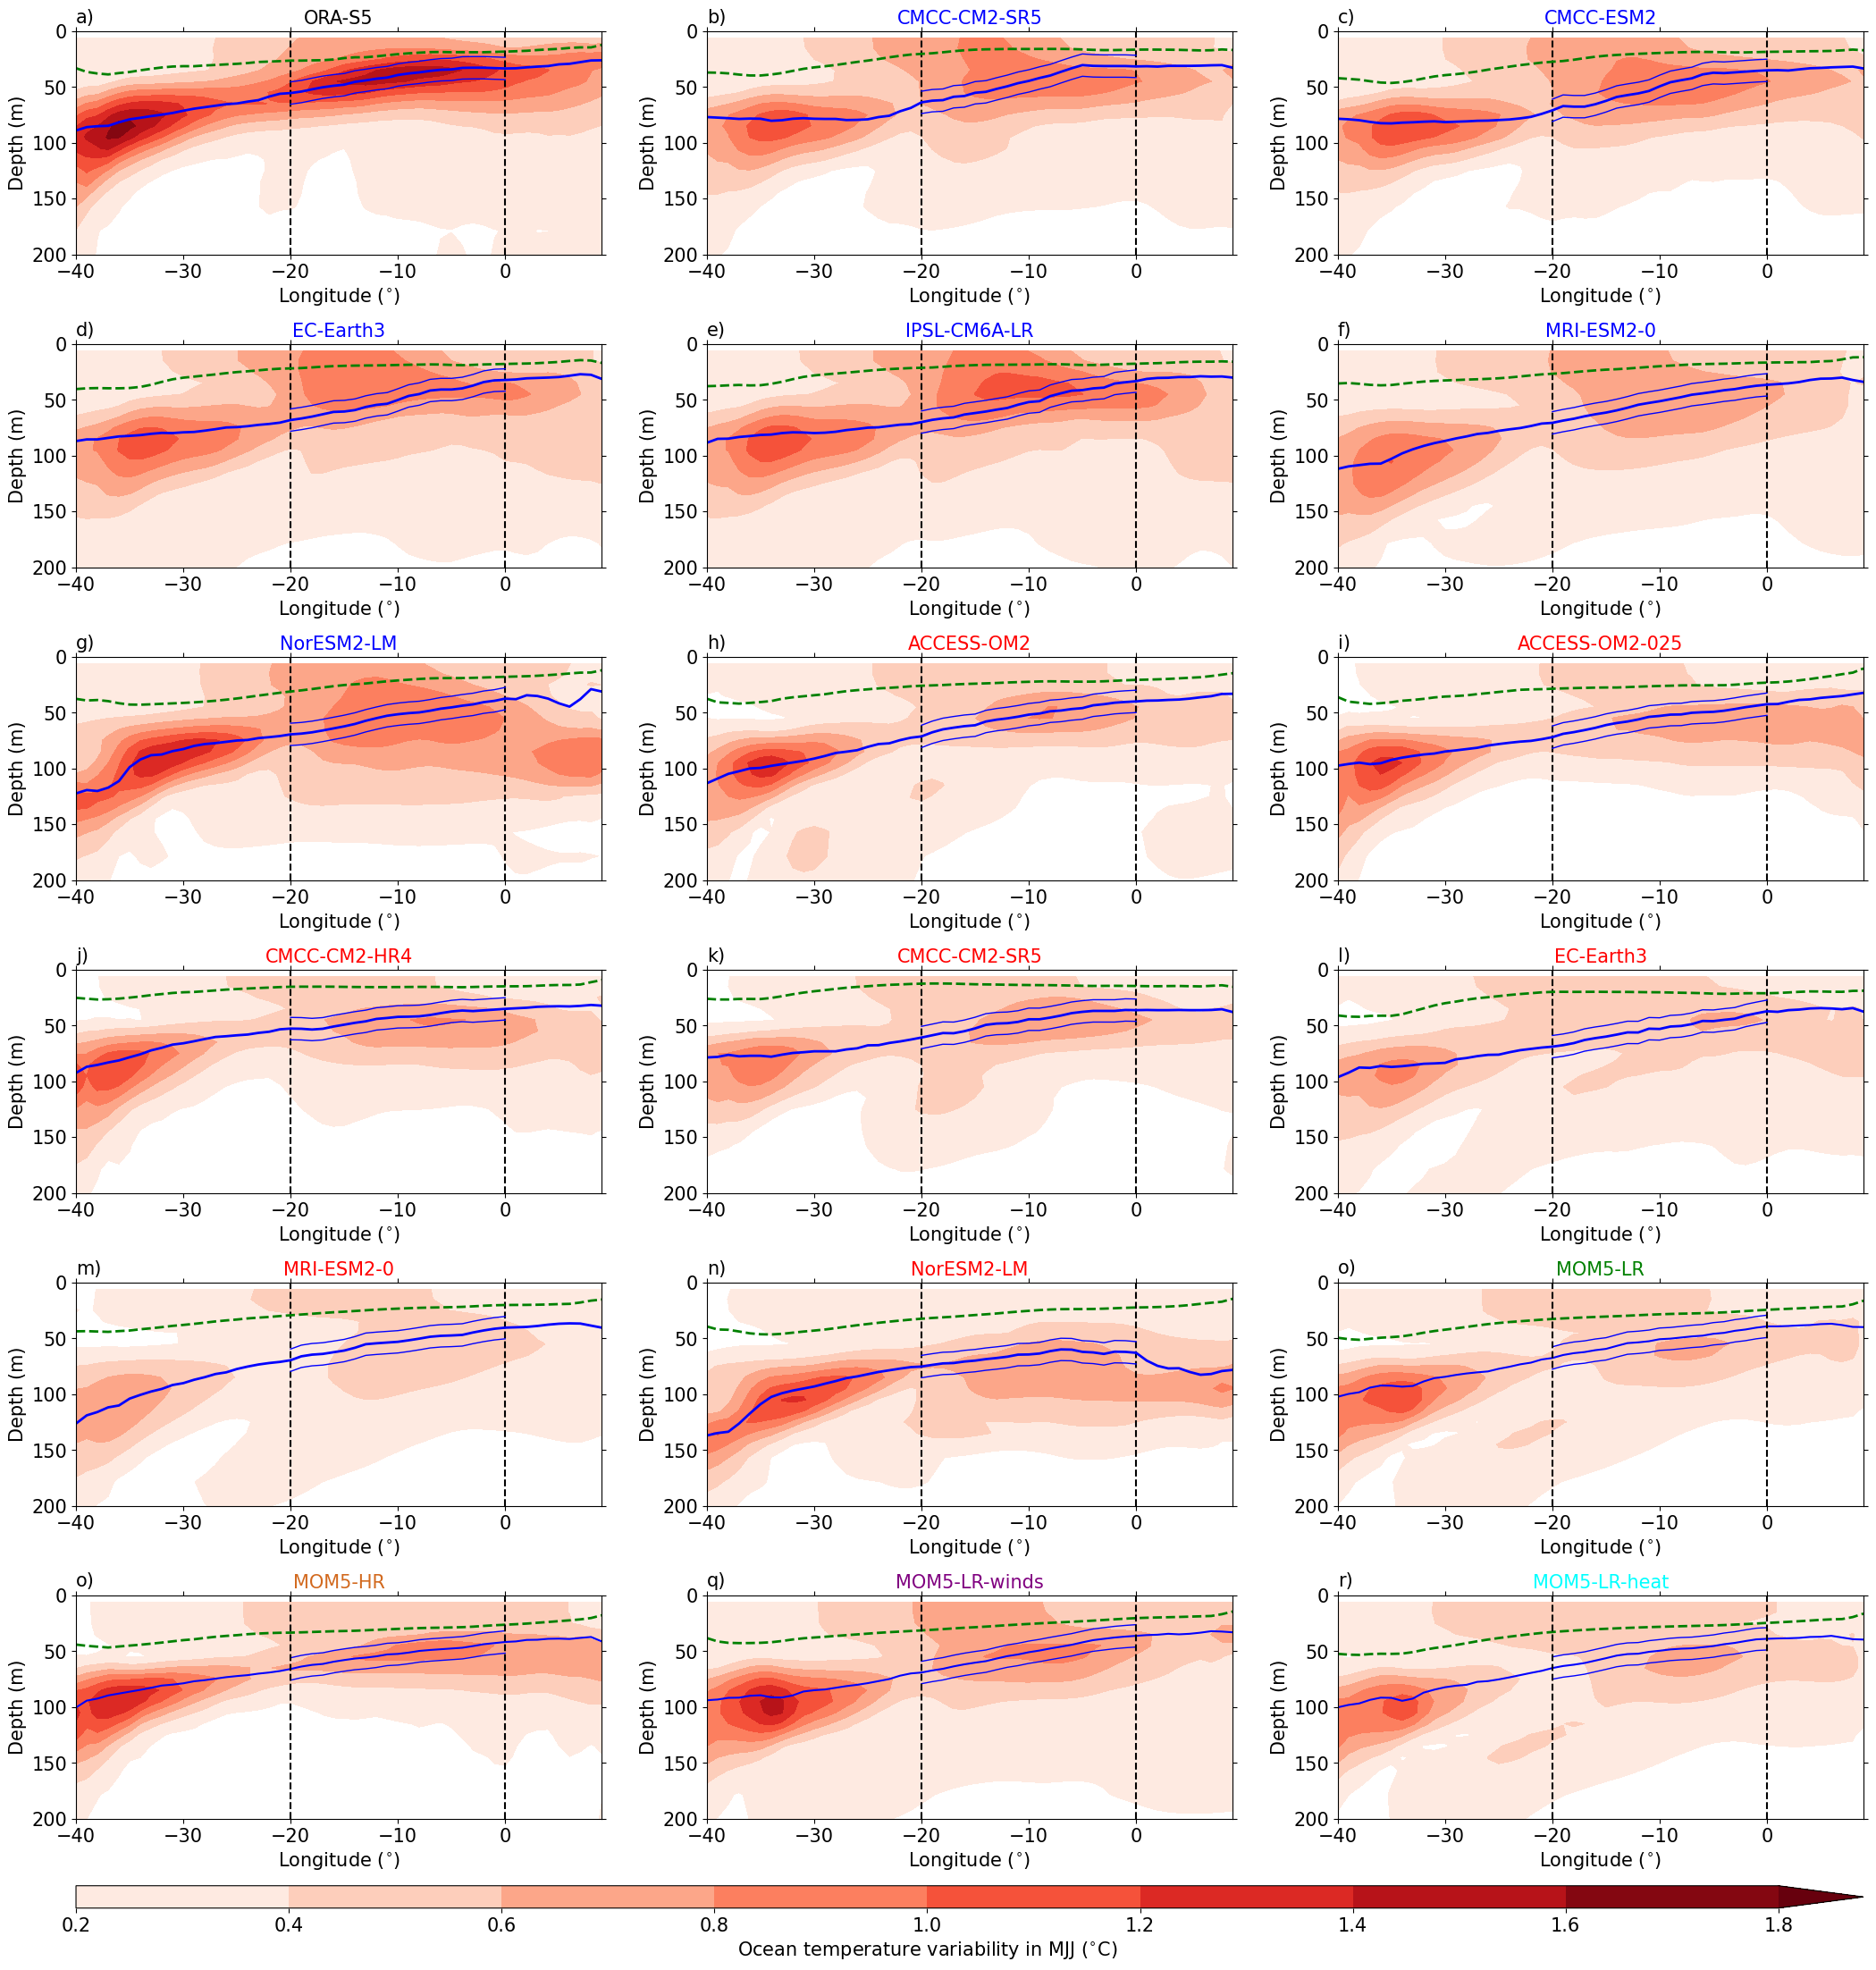

In [18]:
f,ax = plt.subplots(6,3,figsize=[20,20])
f.patch.set_facecolor('white')
cmap = plt.cm.Reds
levels= np.arange(0.2,2,0.2)
ftz=15
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.4, wspace=0.2)
cax0 = inset_axes(ax[15],
                 width='340%',
                 height='10%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.4,1,1),
                 bbox_transform=ax[15].transAxes,
                 borderpad=0)

# MAM
ax[0].set_xlim([-40,9]) 
  
p0 = ax[0].contourf(std_thetao_eq_oras5_jja_mean.lon,
               std_thetao_eq_oras5_jja_mean.depth,
               std_thetao_eq_oras5_jja_mean[:,:],
               cmap=cmap,
               levels=levels,
               extend='max')
ax[0].axvline(0,color='black',linestyle='--')
ax[0].axvline(-20,color='black',linestyle='--')
ax[0].plot(dtdz_eq_oras5_jja.lon,dtdz_eq_oras5_jja,color='blue',linewidth=2)
ax[0].plot(dtdz_eq_oras5_jja_atl3.lon,dtdz_eq_oras5_jja_atl3+10,color='blue',linewidth=1)
ax[0].plot(dtdz_eq_oras5_jja_atl3.lon,dtdz_eq_oras5_jja_atl3-10,color='blue',linewidth=1)


ax[0].plot(mld_eq_oras5_jja_mean.lon,mld_eq_oras5_jja_mean,color='green',linewidth=2,linestyle='--')

ax[0].set_ylim([0,200])


#ax[0].set_title(omip1_models[n],fontsize=ftz)
ax[0].set_ylabel('Depth (m)',fontsize=ftz)
ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
#ax[1].set_title(omip1_models[n],fontsize=ftz)
ax[0].invert_yaxis()

ax[0].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                  labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[0].text(0,1.06,string.ascii_lowercase[0]+')',transform=ax[0].transAxes,size=ftz,
           verticalalignment='center')
ax[0].set_title('ORA-S5',fontsize=ftz)

m = 0
for i in range(1,dtdz_eq_omip1_jja.shape[0]+1):
    ax[i].set_xlim([-40,9]) 
 
    p0 = ax[i].contourf(thetao_eq_all.lon,
                   thetao_eq_all.depth,
                   std_thetao_eq_all_jja_mean[m,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='max')

    ax[i].axvline(0,color='black',linestyle='--')
    ax[i].axvline(-20,color='black',linestyle='--')

    ax[i].set_title(std_thetao_eq_all_jja_mean.model[m].values,
                    fontsize=ftz,color='blue')



    ax[i].plot(dtdz_eq_omip1_jja_atl3.lon,dtdz_eq_omip1_jja_atl3[m]+10,color='blue',linewidth=1)    
    ax[i].plot(dtdz_eq_omip1_jja_atl3.lon,dtdz_eq_omip1_jja_atl3[m]-10,color='blue',linewidth=1)    
    ax[i].plot(dtdz_eq_omip1_jja.lon,dtdz_eq_omip1_jja[m],color='blue',linewidth=2)
    ax[i].plot(mld_eq_omip1_jja.lon,mld_eq_omip1_jja[m],color='green',linewidth=2,linestyle='--')
    ax[i].set_ylim([0,200])
    ax[i].set_ylabel('Depth (m)',fontsize=ftz)
    ax[i].invert_yaxis()
    ax[i].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
    ax[i].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
    ax[i].text(0,1.06,string.ascii_lowercase[i]+')',transform=ax[i].transAxes,size=ftz,
               verticalalignment='center')
    m+=1


n=0

for j in range(dtdz_eq_omip1_jja.shape[0]+1,dtdz_eq_omip1_jja.shape[0]+
               dtdz_eq_omip2_jja.shape[0]+1):
    ax[j].set_xlim([-40,9]) 
 
    p0 = ax[j].contourf(std_thetao_eq_all2_jja_mean.lon,
                   std_thetao_eq_all2_jja_mean.depth,
                   std_thetao_eq_all2_jja_mean[n,:,:],
                   cmap=cmap,
                   levels=levels,
                   extend='max')
    ax[j].axvline(0,color='black',linestyle='--')
    ax[j].axvline(-20,color='black',linestyle='--')
    ax[j].plot(dtdz_eq_omip2_jja_atl3.lon,dtdz_eq_omip2_jja_atl3[n]+10,color='blue',linewidth=1)    
    ax[j].plot(dtdz_eq_omip2_jja_atl3.lon,dtdz_eq_omip2_jja_atl3[n]-10,color='blue',linewidth=1)
    ax[j].plot(dtdz_eq_omip2_jja.lon,dtdz_eq_omip2_jja[n],color='blue',linewidth=2)
    ax[j].plot(mld_eq_omip2_jja.lon,mld_eq_omip2_jja[n],color='green',linewidth=2,linestyle='--')
    ax[j].set_ylim([0,200])
    ax[j].set_title(std_thetao_eq_all2_jja_mean.model[n].values,fontsize=ftz,color='red')


    ax[j].set_ylabel('Depth (m)',fontsize=ftz)
    #ax[1].set_title(omip1_models[n],fontsize=ftz)
    ax[j].invert_yaxis()


    ax[j].text(0,1.06,string.ascii_lowercase[m+n+1]+')',transform=ax[j].transAxes,size=ftz,

               verticalalignment='center')



    ax[j].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                          labelleft=True,labelright=False,labeltop=False,labelbottom=True)
    ax[j].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
    n+=1
    
    
    
ax[14].set_xlim([-40,9]) 
p0 = ax[14].contourf(std_thetao_eq_mom_jja.lon,
                   std_thetao_eq_mom_jja.depth,
                   std_thetao_eq_mom_jja,
                   cmap=cmap,
                   levels=levels,
                   extend='max')  
ax[14].plot(dtdz_eq_mom_jja_atl3.lon,
       dtdz_eq_mom_jja_atl3+10,color='blue',linewidth=1)
ax[14].plot(dtdz_eq_mom_jja_atl3.lon,
       dtdz_eq_mom_jja_atl3-10,color='blue',linewidth=1)

ax[14].plot(dtdz_eq_mom_jja.lon,
           dtdz_eq_mom_jja,
           color='blue')
ax[14].plot(mld_eq_mom_jja.lon,mld_eq_mom_jja,
       color='green',linewidth=2,linestyle='--')
ax[14].axvline(0,color='black',linestyle='--')
ax[14].axvline(-20,color='black',linestyle='--')
ax[14].set_ylim([0,200])
ax[14].set_ylabel('Depth (m)',fontsize=ftz)
ax[14].invert_yaxis()
ax[14].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[14].text(0,1.04,string.ascii_lowercase[14]+')',transform=ax[14].transAxes,size=ftz)
ax[14].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[14].set_title('MOM5-LR',fontsize=ftz,color='green')
    
    
    
ax[15].set_xlim([-40,9]) 
p0 = ax[15].contourf(std_thetao_eq_mom025_jja.lon,
                   std_thetao_eq_mom025_jja.depth,
                   std_thetao_eq_mom025_jja,
                   cmap=cmap,
                   levels=levels,
                   extend='max')  
ax[15].plot(dtdz_eq_mom025_jja_atl3.lon,
       dtdz_eq_mom025_jja_atl3+10,color='blue',linewidth=1)
ax[15].plot(dtdz_eq_mom025_jja_atl3.lon,
       dtdz_eq_mom025_jja_atl3-10,color='blue',linewidth=1)

ax[15].plot(dtdz_eq_mom025_jja.lon,
           dtdz_eq_mom025_jja,
           color='blue')
ax[15].plot(mld_eq_mom025_jja.lon,mld_eq_mom025_jja,
       color='green',linewidth=2,linestyle='--')
ax[15].axvline(0,color='black',linestyle='--')
ax[15].axvline(-20,color='black',linestyle='--')
ax[15].set_ylim([0,200])
ax[15].set_ylabel('Depth (m)',fontsize=ftz)
ax[15].invert_yaxis()
ax[15].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[15].text(0,1.04,string.ascii_lowercase[14]+')',transform=ax[15].transAxes,size=ftz)
ax[15].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[15].set_title('MOM5-HR',fontsize=ftz,color='chocolate')




ax[16].set_xlim([-40,9]) 
p0 = ax[16].contourf(std_thetao_eq_mom_core2_jja.lon,
                   std_thetao_eq_mom_core2_jja.depth,
                   std_thetao_eq_mom_core2_jja,
                   cmap=cmap,
                   levels=levels,
                   extend='max')  
ax[16].plot(dtdz_eq_mom_core2_jja_atl3.lon,
       dtdz_eq_mom_core2_jja_atl3+10,color='blue',linewidth=1)
ax[16].plot(dtdz_eq_mom_core2_jja_atl3.lon,
       dtdz_eq_mom_core2_jja_atl3-10,color='blue',linewidth=1)

ax[16].plot(dtdz_eq_mom_core2_jja.lon,
           dtdz_eq_mom_core2_jja,
           color='blue')
ax[16].plot(mld_eq_mom_core2_jja.lon,mld_eq_mom_core2_jja,
       color='green',linewidth=2,linestyle='--')
ax[16].axvline(0,color='black',linestyle='--')
ax[16].axvline(-20,color='black',linestyle='--')
ax[16].set_ylim([0,200])
ax[16].set_ylabel('Depth (m)',fontsize=ftz)
ax[16].invert_yaxis()
ax[16].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[16].text(0,1.04,string.ascii_lowercase[16]+')',transform=ax[16].transAxes,size=ftz)
ax[16].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[16].set_title('MOM5-LR-winds',fontsize=ftz,color='purple')





    
ax[17].set_xlim([-40,9]) 
p0 = ax[17].contourf(std_thetao_eq_mom_core2_heat_jja.lon,
                   std_thetao_eq_mom_core2_heat_jja.depth,
                   std_thetao_eq_mom_core2_heat_jja,
                   cmap=cmap,
                   levels=levels,
                   extend='max')  
ax[17].plot(dtdz_eq_mom_core2_heat_jja_atl3.lon,
       dtdz_eq_mom_core2_heat_jja_atl3+10,color='blue',linewidth=1)
ax[17].plot(dtdz_eq_mom_core2_heat_jja_atl3.lon,
       dtdz_eq_mom_core2_heat_jja_atl3-10,color='blue',linewidth=1)

ax[17].plot(dtdz_eq_mom_core2_heat_jja.lon,
           dtdz_eq_mom_core2_heat_jja,
           color='blue')
ax[17].plot(mld_eq_mom_core2_heat_jja.lon,mld_eq_mom_core2_heat_jja,
       color='green',linewidth=2,linestyle='--')
ax[17].axvline(0,color='black',linestyle='--')
ax[17].axvline(-20,color='black',linestyle='--')
ax[17].set_ylim([0,200])
ax[17].set_ylabel('Depth (m)',fontsize=ftz)
ax[17].invert_yaxis()
ax[17].tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
              labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax[17].text(0,1.04,string.ascii_lowercase[17]+')',transform=ax[17].transAxes,size=ftz)
ax[17].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[17].set_title('MOM5-LR-heat',fontsize=ftz,color='cyan')

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Ocean temperature variability in MJJ ($^{\circ}$C)',fontsize=ftz)

#ax[-1].axis('off')
plt.savefig(path_fig+'figure_S06.png',bbox_inches='tight',dpi=300)